# Data preparation for machine learning

By: Jacobo Fernandez-Vargas and Luca Citi

Based on the [scikit-learn](http://scikit-learn.org/stable/tutorial/basic/tutorial.html) and [pandas](https://pandas.pydata.org/docs/getting_started/index.html) documentation

## Loading data with Pandas

Pandas is a powerful library used in data analysis. We are not going to explore all its options but only focus on those functionalities that allow us to read data that contains non-numeric values such as text or dates. Pandas can also load data from excel files using the library 'xlrd'. Pandas supports reading and writing other complex data types such as sql, json, html and many more.
When reading CSV files, Pandas tries to infer the type from the values in each column. We can force Pandas to treat a column as containing dates and even specify that we want to treat dates as 'dayfirst', i.e. DD/MM/YYYY (the way used in several countries, including the UK) rather than MM/DD/YYYY (like in the USA).
If we have all numeric values in a CSV format we can also use Numpy directly to read the table but we will not have access to Pandas functionalities.

In [35]:
import pandas as pd

In [36]:
data = pd.read_csv('example1.csv', parse_dates=['Date'], dayfirst=True)
data

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
1,2020-10-16,13.0,Small,Red,112.141170,1
2,2020-10-16,17.0,Medium,Green,112.004677,1
3,2020-10-17,9.0,Large,Green,15.112922,0
4,2020-10-17,11.0,Large,Green,105.663642,1
5,2020-10-17,17.0,Medium,Green,5.158097,0
6,2020-10-18,9.0,Small,Blue,107.947930,1
7,2020-10-18,NaN,Large,Red,8.320838,0
8,2020-10-18,13.0,Large,Red,113.424684,1
9,2020-10-18,15.0,Small,Blue,103.223563,1


Just like `ndarray` is the fundamental brick of the numpy library, the dataframe is the fundamental brick of the pandas library.
A dataframe is a a table where each column is a variable (or series as they are called in Pandas) and each row is a sample. We can access each series using the name of the variable, either using the index notation (`df['v']`) or as field of the object (`df.v`). The latter notation can only be used when the field name is a valid field name (e.g., column '3a' can only be accessed as `df['3a']`).

The method `head` shows only the first 5 entries of the table.

In [38]:
print(data['Date'].head())
print(data.Date.head())

0   2020-10-16
1   2020-10-16
2   2020-10-16
3   2020-10-17
4   2020-10-17
Name: Date, dtype: datetime64[ns]
0   2020-10-16
1   2020-10-16
2   2020-10-16
3   2020-10-17
4   2020-10-17
Name: Date, dtype: datetime64[ns]


To select rows, we can use either conditional indexing or a more traditional numeric indexing.
For example let's select the rows for which the colour is blue.

In [40]:
data[data["Colour"] == 'Blue']

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
6,2020-10-18,9.0,Small,Blue,107.947930,1
9,2020-10-18,15.0,Small,Blue,103.223563,1
11,2020-10-19,9.0,Medium,Blue,105.216665,1
13,2020-10-19,13.0,Large,Blue,15.599248,0
16,2020-10-20,NaN,Large,Blue,113.658567,1
18,2020-10-23,11.0,Medium,Blue,3.643787,0
21,2020-10-25,NaN,Large,Blue,10.699388,0
24,2020-10-26,13.0,Small,Blue,1.228235,0
27,2020-10-28,13.0,Large,Blue,12.414377,0


Now let's select the first five rows.

In [42]:
data.iloc[:5,:]

,Date,Time,Size,Colour,Cost,Label
0,2020-10-16,11.0,Small,Blue,109.521068,1
1,2020-10-16,13.0,Small,Red,112.141170,1
2,2020-10-16,17.0,Medium,Green,112.004677,1
3,2020-10-17,9.0,Large,Green,15.112922,0
4,2020-10-17,11.0,Large,Green,105.663642,1


Pandas is a really powerful tool but in the interest iof time we are not going to explain it further. However you can visit these [tutorials](https://pandas.pydata.org/docs/getting_started/index.html) to learn more about it.

## Prepare the data

Now that we have the data in the dataframe we will process it to transform all its values into numerical ones.
There are mainly two types of data that may be necessary to transform: dates and categorical values.
We can see what type of data we have in our dataframe:

In [46]:
data.dtypes

Date      datetime64[ns]
Time             float64
Size              object
Colour            object
Cost             float64
Label              int64
dtype: object

(Note that the methods we see in this section replace non-numerical values with floating point numbers _in place_, so if you run them again you will get an error since the column does not contain the expected type anymore.)

### Dates

A standard way to transform dates is to change them into the time passed since a specific reference time point. This is as simple as:

In [50]:
time0 = pd.Timestamp('2020-08-01 00:00:00')
data['Date'] = (data['Date'] - time0).values.astype(float)
data.head()

,Date,Time,Size,Colour,Cost,Label
0,6.566400e+15,11.0,Small,Blue,109.521068,1
1,6.566400e+15,13.0,Small,Red,112.141170,1
2,6.566400e+15,17.0,Medium,Green,112.004677,1
3,6.652800e+15,9.0,Large,Green,15.112922,0
4,6.652800e+15,11.0,Large,Green,105.663642,1


### Categorical values

Categorical values are non numerical values that may or may not have an ordinal relationship. If they have an ordinal relationship (for example: low, mid, high or small, big), a simple approach is to transform directly to numerical value respecting the order (although this will impose an arbitrary distance between the values).

Pandas allows use to do this using a dictionary and the method `replace`.

In [54]:
cleanup = {"Size": {"Small":0, "Medium":1, "Large":2}}
data.replace(cleanup, inplace=True)
data.head()

/tmp/ipykernel_116921/4016966426.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.replace(cleanup, inplace=True)


,Date,Time,Size,Colour,Cost,Label
0,6.566400e+15,11.0,0,Blue,109.521068,1
1,6.566400e+15,13.0,0,Red,112.141170,1
2,6.566400e+15,17.0,1,Green,112.004677,1
3,6.652800e+15,9.0,2,Green,15.112922,0
4,6.652800e+15,11.0,2,Green,105.663642,1


This method should not be used with categorical values with no ordinal relationship, for example the colour. Is red bigger than blue?


If we treat them as having ordinal relationship some algorithms may be unaffected by this. However, most algorithms will suffer (in terms of accuracy) when using this practice.
The 'proper' way to deal with such values is to create a number of variables equal to the the number of different values that the categorical value may take, and then set all to 0 except for one that will set to 1. This is called 'one-hot' encoding. In our case it would be somthing like:

Red -> \[0, 0, 1\]

Blue -> \[1, 0, 0\]

Green -> \[0, 1, 0\]

Fortunately, pandas makes this easy with the method `get_dummies`.

In [56]:
data = pd.get_dummies(data, columns= ['Colour'])
data.head()

,Date,Time,Size,Cost,Label,Colour_Blue,Colour_Green,Colour_Red
0,6.566400e+15,11.0,0,109.521068,1,True,False,False
1,6.566400e+15,13.0,0,112.141170,1,False,False,True
2,6.566400e+15,17.0,1,112.004677,1,False,True,False
3,6.652800e+15,9.0,2,15.112922,0,False,True,False
4,6.652800e+15,11.0,2,105.663642,1,False,True,False


We can now confirm that all columns have been converted to numeric types.

In [58]:
data.dtypes

Date            float64
Time            float64
Size              int64
Cost            float64
Label             int64
Colour_Blue        bool
Colour_Green       bool
Colour_Red         bool
dtype: object

Finally we want to transfer our data to two numpy arrays, one containing the variables (features) and another the labels (ground truth).

In [60]:
import numpy as np
x = data.loc[:, data.columns != 'Label'].astype(float).to_numpy()
y = data.loc[:, 'Label'].to_numpy()
print(x.shape, y.shape)

(33, 7) (33,)


## Data Visualization

It is good practice to visualize the data to see if there is something obviously wrong. The matplotlib library includes a number of useful visualisation tools to help us. Getting familiar with this library (or a similar one) and its functions is a first step become a data scientist. Among the many functions make sure you become familiar with scatter, plot, and bar!

### False predictors

In some ocassions we may have a variable that is a false predictor, meaning that it's been introduced in the data by mistake and contains information about the label. Let's imagine that we have a dataset of clients of a bank, and we want to predict if a client will buy an add-on insurance. One of the variables could be how much the client pays to the bank for its services. If this price includes the cost of the insurance, this will result in a variable that may have a strong prediction power but won't work during the deployment because we will detect only the clients that already have an insurance.

In our data there is one false predictor, could you point which one looking at the plots?

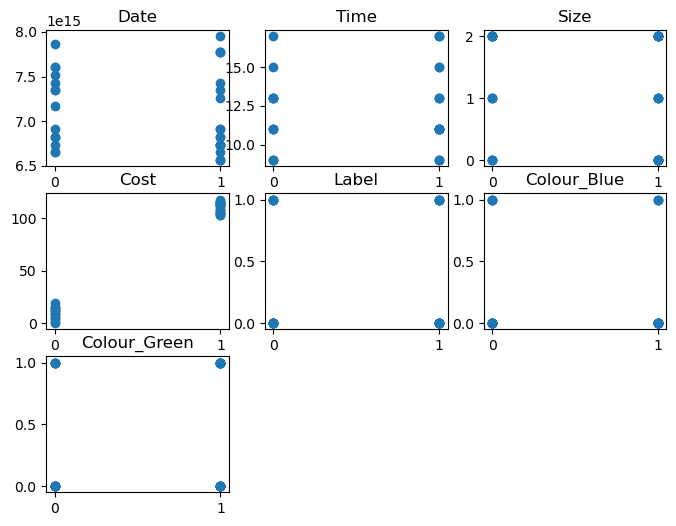

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
for i in range(x.shape[1]):
    plt.subplot(3, 3, i+1)
    plt.scatter(y,x[:,i])
    plt.xticks([0, 1])
    plt.title(data.columns[i])

## Cross-validation
Learning the parameters of a prediction function and testing it on the same data is a methodological mistake: a model may memorise the training data perfectly and have a perfect score but would fail to predict anything useful on yet-unseen data. This situation is called overfitting. To avoid it, when performing a (supervised) machine learning task, it is common practice to hold out part of the available data as a test set, which we will store in the variables `X_test` and `y_test`. 

Conceptually, we need to simulate the future situation, where we have trained our system with some data and, then, we apply it to some unseen data. However, to get better estimates of the accuracy of our model on new data, it is good practice to repeat the procedure after rotating which part of the data are used for train and which for testing. One such methos is called *cross-validation* and helps reduce the variability in estimating the accuracy on new data.

Scikit-learn is a library for machine learning (more on this in the next lab). It has a collection of classes which can be used to generate lists of train/test indices for popular cross-validation strategies.

They expose a `split` method which accepts the input dataset to be split and yields the train/test set indices for each iteration of the chosen cross-validation strategy.

In [70]:
from sklearn.model_selection import KFold

k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print('Train: %s | test: %s' % (train_indices, test_indices))

Train: [ 7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [0 1 2 3 4 5 6]
Train: [ 0  1  2  3  4  5  6 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [ 7  8  9 10 11 12 13]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 21 22 23 24 25 26 27 28 29 30
 31 32] | test: [14 15 16 17 18 19 20]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 27 28 29
 30 31 32] | test: [21 22 23 24 25 26]
Train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26] | test: [27 28 29 30 31 32]


Graphically, we can represent the cross validation loop as follows (where 'O' reprersents a training sample and '•' a test one):

In [72]:
for train_indices, test_indices in k_fold.split(x):
    for i in range(len(x)):
        print('O' if i in train_indices else '•', end='')
    print('')

•••••••OOOOOOOOOOOOOOOOOOOOOOOOOO
OOOOOOO•••••••OOOOOOOOOOOOOOOOOOO
OOOOOOOOOOOOOO•••••••OOOOOOOOOOOO
OOOOOOOOOOOOOOOOOOOOO••••••OOOOOO
OOOOOOOOOOOOOOOOOOOOOOOOOOO••••••


Cross-validation is the cornerstone of supervised machine learning design. All the data-dependent manipulations (not only classification, but also pre-processing) must happen inside Cross-Validation loops when analysing the performance of a system.

Multiple cross-validation loops can be nested when performing hyper-paramether fitting. We will explore this in the next lab. See this [link](https://stats.stackexchange.com/q/292179) for a graphical representation of nested cross-validation.

The `Kfold` class in sklearn, has another paramether, shuffle. Read the documentation about it and explore what changes when its value is True.

## Pre-processing

### Missing data

It is common to have missing values in some of the variables. We can see this counting the number of NaN (Not a Number) in our dataset:

In [79]:
np.sum(np.isnan(x), 0)

array([0, 4, 0, 0, 0, 0, 0])

Here we can see that the second variable in our dataset has some values that are missing.

#### Default value

The fastest and easiest way to deal with missing data, is to assing a default value (ex. 0). This is possible if we know something about the variable and which may be a good default value, but sometimes we don't.

#### Data-driven value

A better option, is to use a value that is derived from the data, such as the mean, median or other statistical value. However, as mentioned before, this should happen inside the cross-validation (i.e. any value used for imputation must be computed using only the training data).

Here we calculate the mean of the second variable in our dataset for different folds. We use the function `nanmean` from numpy to calculate the mean of an array containing NaN values.

In [86]:
k_fold = KFold(n_splits=5)
for train_indices, test_indices in k_fold.split(x):
    print(np.nanmean(x[train_indices, 1]))

12.272727272727273
12.130434782608695
12.304347826086957
12.416666666666666
12.416666666666666


As you can see the value of that mean differs for each fold. This is why is important to do it inside the fold validation loop.

### Data transformation

Many algorithms work better when the data are inside a specific range, or when all the data have similar ranges. This is not the case for all the algorithms (some work equally well with unnormalised or normalised data).

#### Data-clipping

One option is to just set predefined maximum and minimum values. For this, we can use the `clip` method from numpy.

#### Scaling and Normalization

In the same way, as with the missing data, a better practice is to perfform this procedure in a data-driven manner. For this, sklearn provides several options in its 'preprocessing' package. As before, this normalisation step should be included inside the cross validation loop as well.

In [94]:
from sklearn.preprocessing import StandardScaler
k_fold = KFold(n_splits=5)
x_or = x.copy() # We make a copy of our data to avoid overwriting
for train_indices, test_indices in k_fold.split(x):
    mean = np.nanmean(x_or[train_indices, 1])
    x[np.isnan(x_or[:,1]), 1] = mean # We substitute the missing values for the mean
    ss = StandardScaler()
    ss.fit(x[train_indices, :])
    x_train = ss.transform(x[train_indices, :])
    x_test = ss.transform(x[test_indices, :])

In this example we see something that is common in many methods in the sklearn package, the division between `fit` and `transform`. These allow to the creation of pipelines which help streamline the modeling of different methods.